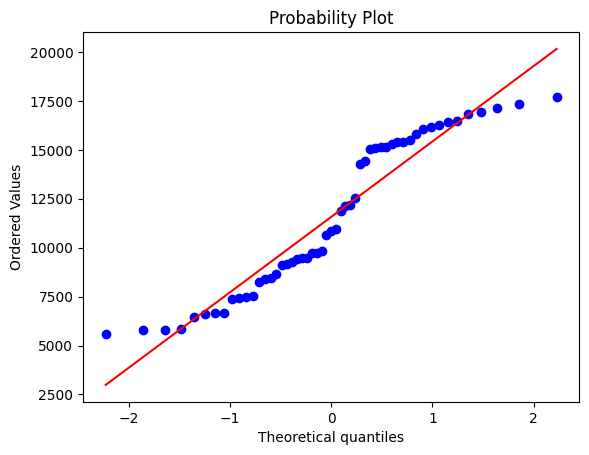

При р-уровне значимости 0,05 Различий между изминением количества пожилых людей и детей нет
При р-уровне значимости 0,002 Есть различие между изминением количества пожилых людей и детей
Средний показатель на душу населения = ID * 3.8079 + WorkingPopulation * 0.6685 + Seniors * 0.0121 + Children * 0.2399 + 173.4104
Расчетный показатель на душу населения на II квартал 2020 года составит: 21018.03


In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
data = pd.read_csv("https://video.ittensive.com/math-stat/data-6048-2020-06-29.utf.csv", delimiter=";")
y=np.array(data["AveragePerCapita"])
ID=np.array(data['ID']).reshape(-1, 1)
x=data.drop(labels=['AveragePerCapita', 'global_id', "Quarter", "Resolution", 'Unnamed: 8'], axis=1)
st.probplot(y, dist = 'norm', plot = plt)
plt.show()
x1=np.array(data["Seniors"])
x2=np.array(data["Children"])
x3=np.array(data["WorkingPopulation"])
x1_mean=np.mean(x1)
x2_mean=np.mean(x2)
x1_std=st.sem(x1)
x2_std=st.sem(x2)
stats=st.f_oneway(x1, x2)
T=((x2_mean-x1_mean)/np.sqrt((x2_std**2)+(x1_std**2)))
S=len(x1)+len(x2)-2
print ("При р-уровне значимости 0,05", end=" ")
if stats[1] < 0.05:
    if st.ttest_ind(x1, x2)[1] < 0.05/3:
        print("Различий между изминением количества пожилых людей и детей нет")
else:
    print ("Есть различие между изминением количества пожилых людей и детей")
print ("При р-уровне значимости 0,002", end=" ")    
if stats[1] < 0.002:
    if st.ttest_ind(x1, x2)[1] < 0.002/3:
        print("Различий между изминением количества пожилых людей и детей нет")
else:
    print ("Есть различие между изминением количества пожилых людей и детей")
print ("Средний показатель на душу населения = ", end="")
model = LinearRegression().fit(x, y)
r_sq_base = model.score(x, y)
i=0
for label in x.columns:
    print (label, "*", round(model.coef_[i], 4), "+ ", end="")
    i += 1
print (round(model.intercept_, 4))
i1=0
model = LinearRegression().fit(ID, x2)
a=54
ch=a*model.coef_[i1]+model.intercept_
i2=0
model = LinearRegression().fit(ID, x1)
a=54
sen=a*model.coef_[i2]+model.intercept_
i3=0
model = LinearRegression().fit(ID, x3)
a=54
work=a*model.coef_[i3]+model.intercept_
APC=a*54+work*0.6685+sen*0.0121+ch*0.2399+173.4104
print("Расчетный показатель на душу населения на II квартал 2020 года составит:", round(APC, 3))
